# Excel bestanden lezen
## Een aparte engine
Python kan standaard geen Excelbestanden lezen, maar er zijn modules om daar bij te helpen. We moeten dan rekening houden met het feit dat er verschillende bestandsformaten zijn:
- .xls: het oude excelformaat kan gelezen worden met *xlrd*
- .xlsx: het nieuwe excelformaat kan gelezen woren met *openpyxl*
- .ods: het formaat van de gratis concurrent *libreoffice* kan gelezen worden met *odf*

We zullen een .xlsx bestand lezen. Hiervoor moeten we *openpyxl* installeren:
```
pip install openpyxl
```

## Speel je lotto?
We kunnen de statistieken van de lotto-trekkingen downloaden. Omdat men ervan uitgaat dat het bestand gedownload wordt door een browser, moeten we bij request.get() een header meegeven. Wat we daar invullen, maakt niet uit. Dus 'Syntra browser' werkt. 

In [2]:
from pathlib import Path
import requests
STATISTIEKEN = 'statistieken-lotto-12-25.xlsx'
statistieken_path = Path(STATISTIEKEN)
if not statistieken_path.exists():
    URL='https://www.nationale-loterij.be/content/dam/opp/draw-games/lotto/brand-assets/documents/nl/statistieken-lotto-12-25.xlsx'
    headers = {'User-Agent': 'Syntra browser'}     
    data = requests.get(URL, headers=headers)

    STATISTIEKEN = 'statistieken-lotto-12-25.xlsx'
    with open(STATISTIEKEN, mode='wb') as f:
        f.write(data.content)
else:
    print('Bestand moet niet gedownload worden.')

Bestand moet niet gedownload worden.


## Een Excel workbook bestaat uit worksheets
Het bestand bevat verschillende worksheets.

In [51]:
import openpyxl
excel = openpyxl.load_workbook(STATISTIEKEN)
excel.sheetnames

['Alle periodes',
 '2011-2025 45 nummers',
 '1983-2011 42 nummers',
 '1978-1983 40 nummers',
 'TOP 10 inzetten',
 'TOP 10 winsten',
 'TOP 10 bedragen Rang 1',
 'Resultaten']

## Lezen met read_excel()
Omdat er verschillende worksheets zijn, moeten we een sheet_name meegeven. Een table in Excel kan eender waar staan. Daarom geven we ook mee op welke rij de tabel begint (skiprows) en hoeveel rijen de tabel bevat (nrows)

In [4]:
import pandas as pd

df = pd.read_excel(STATISTIEKEN, sheet_name='Resultaten', engine='openpyxl', skiprows=4, nrows=1488, index_col='Trekkingsdatum')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1488 entries, 2025-12-31 to 2011-10-01
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   N°1       1488 non-null   int64
 1   N°2       1488 non-null   int64
 2   N°3       1488 non-null   int64
 3   N°4       1488 non-null   int64
 4   N°5       1488 non-null   int64
 5   N°6       1488 non-null   int64
 6   Bonusnr.  1488 non-null   int64
dtypes: int64(7)
memory usage: 93.0 KB


## Zijn de getallen gelijk verdeeld?
Wanneer er 45 getallen getrokken kunnen worden, zou het gemiddelde van alle waarden 22,5 moeten zijn.

In [5]:
getallen = df.to_numpy()
getallen.mean()

np.float64(23.058467741935484)

## Een andere manier
We kunnen numpy.unique gebruiken om te tellen hoe dikwijls elk getal voorkomt. 

In [7]:
import numpy as np
getal, aantallen = np.unique(getallen, return_counts=True)
print(aantallen)
df_getallen = pd.DataFrame({'aantallen':aantallen}, index=getal)
df_getallen.info()


[249 222 241 226 206 215 233 233 219 221 231 239 221 240 229 255 232 257
 252 248 241 216 204 235 242 225 238 249 225 212 203 202 233 224 248 233
 205 250 228 229 240 244 251 240 230]
<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 1 to 45
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   aantallen  45 non-null     int64
dtypes: int64(1)
memory usage: 720.0 bytes


## Een barplot met de verdeling van de 45 lottogetallen
Dat is de beste plot om te zien of de waarden gelijkmatig verdeeld zijn.

<Axes: >

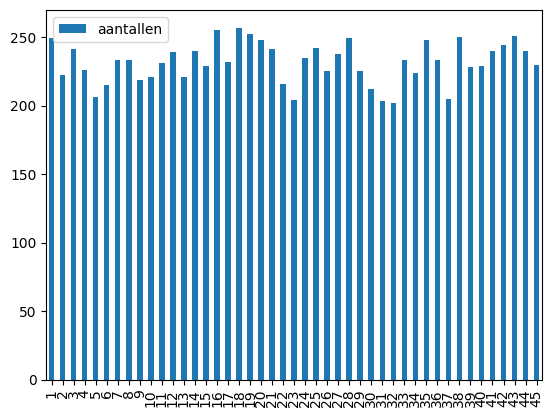

In [50]:
df_getallen.plot(kind='bar')

## Plotten van de gegevens met matplotlib
We kunnen het ook met Matplotlib doen.

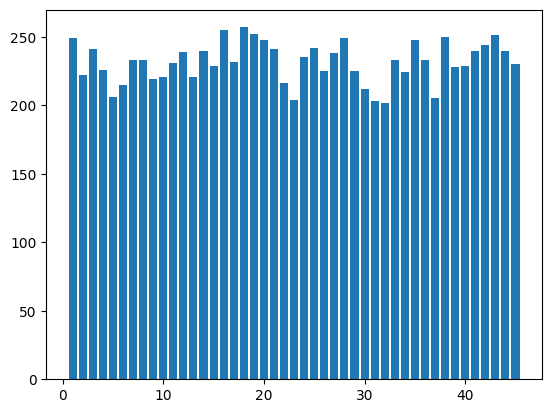

In [41]:
import matplotlib.pyplot as plt
plt.bar(df_getallen.index, df_getallen['aantallen'])
plt.show()